# 7.7 AdaDelta算法

In [1]:
%matplotlib inline
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

features, labels = d2l.get_data_ch7()

## 7.7.1 算法
## 7.7.2 从零开始实现

In [2]:
def init_adadelta_states():
    s_w, s_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    delta_w, delta_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * (p.grad.data**2)
        g =  p.grad.data * torch.sqrt((delta + eps) / (s + eps))
        p.data -= g
        delta[:] = rho * delta + (1 - rho) * g * g

loss: 0.246483, 0.061862 sec per epoch


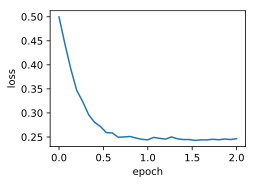

In [3]:
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features, labels)

## 7.7.3 简洁实现

loss: 0.242104, 0.047702 sec per epoch


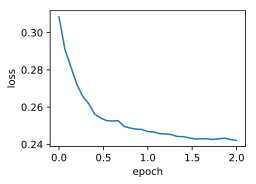

In [4]:
d2l.train_pytorch_ch7(torch.optim.Adadelta, {'rho': 0.9}, features, labels)